In [ ]:
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.15.0


In [ ]:
import keras

In [ ]:
#data preparation or importing data
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data() #partition the data in two parts training and testing
#explore the data
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


7


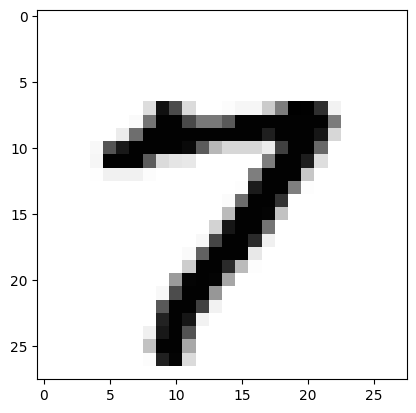

In [ ]:
import matplotlib.pyplot as plt
index_image = 5555
print(y_train[index_image])
plt.imshow(x_train[index_image],cmap='Greys')
plt.show()

In [ ]:
#data preprocessing
#4d form as input (size of data, 28, 28,1)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
#converting data in the form of float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data in range of 0-1
x_train/= 255
x_test/= 255
print()

In [ ]:
from keras.models import Sequential
from keras import models,layers
#instantiate the model or empty model
model=Sequential()
#C1 convolutional layer
model.add(layers.Conv2D(6,kernel_size=(5,5),strides=(1,1), activation='tanh',input_shape=(28,28,1),padding="same"))
#S2 pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

#C3 Convolutional Layer
model.add(layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))
#S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#fc5 layer
model.add(layers.Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='same'))
#flatten layer
model.add(layers.Flatten())
#dense layer fc6
model.add(layers.Dense(84,activation='tanh'))
#output layer
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=["accuracy"])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 27, 27, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 11, 11, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 120)       48120     
                                                                 
 flatten (Flatten)           (None, 14520)             0

In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#to train our convolutional network
hist = model.fit(x=x_train,y=y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test),verbose=1)


Epoch 1/10
469/469 [==============================] - 123s 260ms/step - loss: 0.6155 - accuracy: 0.8471 - val_loss: 0.3041 - val_accuracy: 0.9178
Epoch 2/10
469/469 [==============================] - 120s 255ms/step - loss: 0.2738 - accuracy: 0.9230 - val_loss: 0.2338 - val_accuracy: 0.9317
Epoch 3/10
469/469 [==============================] - 112s 239ms/step - loss: 0.2207 - accuracy: 0.9372 - val_loss: 0.1940 - val_accuracy: 0.9442
Epoch 4/10
469/469 [==============================] - 113s 241ms/step - loss: 0.1894 - accuracy: 0.9462 - val_loss: 0.1699 - val_accuracy: 0.9509
Epoch 5/10
469/469 [==============================] - 115s 244ms/step - loss: 0.1673 - accuracy: 0.9526 - val_loss: 0.1540 - val_accuracy: 0.9555
Epoch 6/10
469/469 [==============================] - 116s 247ms/step - loss: 0.1504 - accuracy: 0.9579 - val_loss: 0.1370 - val_accuracy: 0.9614
Epoch 7/10
469/469 [==============================] - 119s 254ms/step - loss: 0.1371 - accuracy: 0.9617 - val_loss: 0.1273 -

In [ ]:
# y_test[:4]

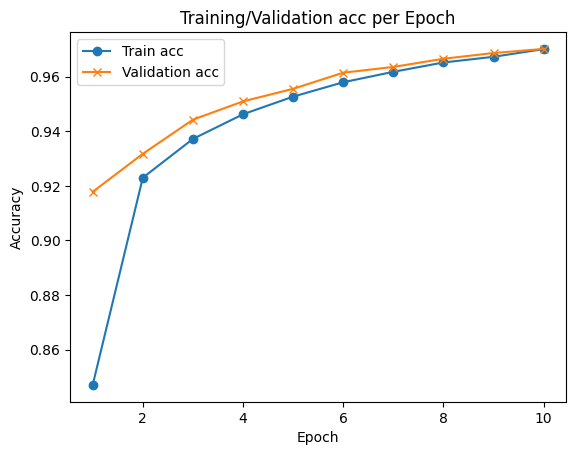

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# plot legend and use the best location automatically: loc = 0
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.show()



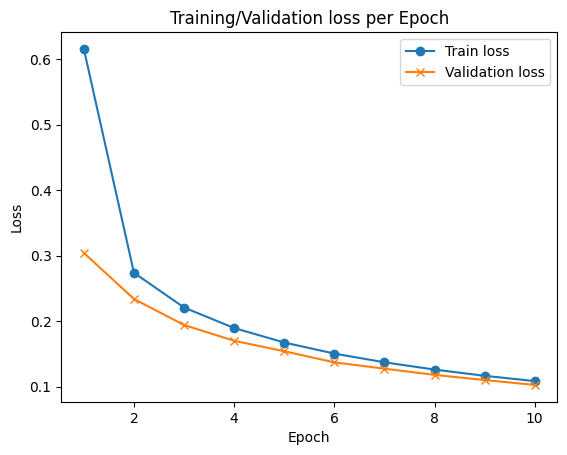

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None]+hist.history['loss'], 'o-')
ax.plot([None]+hist.history['val_loss'], 'x-')
# plot legend and use the best location automatically: loc = 0
ax.legend(['Train loss', 'Validation loss'], loc=0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()



In [ ]:
#Predict the value
model.predict(x_test[:4])

1/1 [==============================] - 0s 132ms/step


array([[4.7310481e-05, 1.1604485e-05, 2.7973906e-04, 6.4932567e-04,
        1.9559677e-05, 1.0718070e-04, 5.0929305e-07, 9.9879301e-01,
        2.0837793e-05, 7.0857110e-05],
       [3.0964692e-03, 1.0409687e-03, 9.8914427e-01, 3.2502364e-03,
        1.1880975e-06, 1.0181714e-03, 5.5002369e-04, 2.5169156e-06,
        1.8387407e-03, 5.7410416e-05],
       [8.5288830e-06, 9.9851352e-01, 3.6742928e-04, 1.9947113e-04,
        1.0014545e-04, 4.0173276e-05, 2.1182340e-04, 3.6837519e-04,
        1.8304955e-04, 7.5461821e-06],
       [9.9714643e-01, 2.6049440e-06, 4.5899689e-04, 1.8527376e-04,
        3.9601906e-05, 8.6861744e-04, 5.4887892e-04, 1.2258654e-04,
        3.6119361e-04, 2.6582659e-04]], dtype=float32)